<a href="https://colab.research.google.com/github/Jawaaa/Proyek-ML/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Zahwa_Rizzi_Ani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [14]:
# Memuat dataset
df = pd.read_csv('clustered_data.csv')

# Menampilkan beberapa baris pertama dataset
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  Cluster  \
0  12/1/2010 8:26       2.55       17850  United Kingdom        0   
1  12/1/2010 8:26       3.39       17850  United Kingdom        0   
2  12/1/2010 8:26       2.75       17850  United Kingdom        0   
3  12/1/2010 8:26       3.39       17850  United Kingdom        0   
4  12/1/2010 8:26       3.39       17850  United Kingdom        0   

   Cluster_Selected  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [15]:
# Memisahkan fitur dan target
X = df.drop(['Cluster_Selected'], axis=1)  # Fitur
y = df['Cluster_Selected']  # Target

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [26]:
# Import library
from sklearn.preprocessing import LabelEncoder

# Buat label encoder
label_encoder = LabelEncoder()

# Melatih data kolom X dan encoder Featurege
for column in X_train.select_dtypes(include=['object']).columns:
    # Langkah-langkah untuk Menggunakan LabelEncoder pada Data Gabungan (Pelatihan dan Pengujian)
    all_values = pd.concat([X_train[column], X_test[column]]).unique()
    label_encoder.fit(all_values)

    X_train[column] = label_encoder.transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Membuat model Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Penjelasan Proses:

1. Preprocessing Data dengan LabelEncoder: Di awal, kita bekerja dengan
data yang memiliki kolom kategori (misalnya, jenis kelamin, warna, atau kategori lainnya). Karena model machine learning tidak bisa langsung bekerja dengan data kategori (seperti teks), kita perlu mengubahnya menjadi angka. Di sini, kita menggunakan LabelEncoder, yang berfungsi mengubah nilai kategori menjadi angka. Tapi sebelum melakukan itu, kita menggabungkan semua nilai kategori dari data pelatihan (X_train) dan data pengujian (X_test). Ini dilakukan agar LabelEncoder tahu semua kategori yang ada, baik di data pelatihan maupun pengujian, dan memberikan angka yang konsisten untuk kategori yang sama.

2. Membangun Model Random Forest: Setelah data siap (sudah diubah menjadi angka), langkah berikutnya adalah membangun model menggunakan Random Forest. Random Forest adalah model machine learning yang menggunakan banyak pohon keputusan (seperti pohon yang bisa memutuskan apakah seseorang cocok dengan kategori tertentu atau tidak). Setiap pohon akan mengambil keputusan berdasarkan data yang sedikit berbeda, dan akhirnya semua pohon ini akan memberikan prediksi. Hasil akhirnya adalah keputusan yang diambil berdasarkan suara terbanyak dari semua pohon yang ada. Model ini sangat kuat karena menggabungkan banyak keputusan untuk memprediksi hasil dengan lebih akurat dan menghindari kesalahan besar.

3. Melatih Model: Di bagian ini, model Random Forest dilatih menggunakan data pelatihan (X_train) dan hasil yang benar (y_train). Model akan belajar dari data yang diberikan untuk memahami pola dan hubungan antar fitur, sehingga nantinya bisa digunakan untuk memprediksi kategori pada data baru (seperti data pengujian).

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Accuracy: 0.9987
F1-Score: 0.9984
Precision, Recall, dan F1-Score per kelas:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       741
           2       1.00      0.50      0.67         2

    accuracy                           1.00       743
   macro avg       1.00      0.75      0.83       743
weighted avg       1.00      1.00      1.00       743



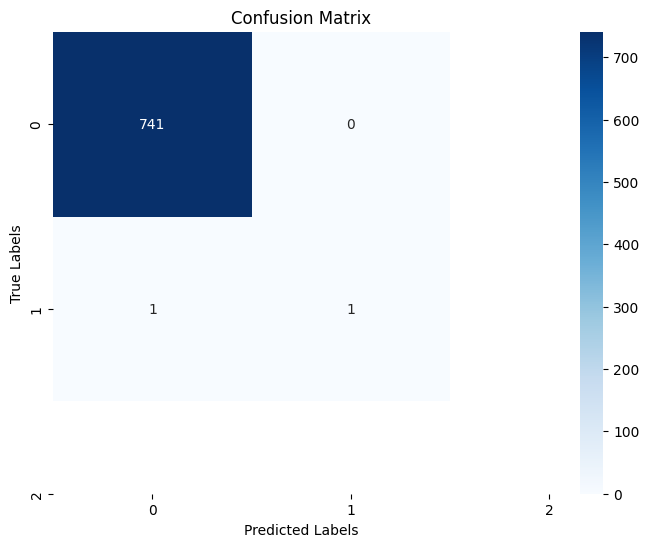

RandomForestClassifier(random_state=42)

In [23]:
# Pastikan model sudah dilatih terlebih dahulu
model = RandomForestClassifier(random_state=42)

# Pastikan kita sudah melatih model sebelum melakukan prediksi
model.fit(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan model sudah dilatih terlebih dahulu
model = RandomForestClassifier(random_state=42)

# Pastikan kita sudah melatih model sebelum melakukan prediksi
model.fit(X_train, y_train)

# Lakukan prediksi menggunakan data uji
y_pred = model.predict(X_test)

# Hitung metrik evaluasi seperti Accuracy dan F1-Score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Anda bisa menggunakan 'macro' atau 'micro' jika perlu
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

# Opsional: Precision dan Recall per kelas
precision_recall = classification_report(y_test, y_pred)
print("Precision, Recall, dan F1-Score per kelas:\n", precision_recall)

# Buat confusion matrix untuk melihat detail prediksi benar dan salah
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Iterate through columns of X_train and encode categorical features
for column in X_train.select_dtypes(include=['object']).columns:
    # Fit the LabelEncoder on the combined unique values from both training and testing data
    all_values = pd.concat([X_train[column], X_test[column]]).unique()
    label_encoder.fit(all_values)

    X_train[column] = label_encoder.transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column]) # Apply the same encoding to X_test

# Now you can fit the model
# Removed the first model fitting here
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)


# Membangun model Random Forest - This is where the model should be fit after transformation
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

Model memiliki akurasi yang sangat tinggi (99.87%), yang menunjukkan bahwa model hampir sempurna dalam memprediksi data uji.
Namun, terdapat kelemahan dalam memprediksi kelas minoritas (kelas 2), karena recall hanya 50% (hanya satu dari dua sampel yang terdeteksi dengan benar).
Jika data tidak seimbang (kelas 2 memiliki jumlah sampel yang jauh lebih sedikit), Anda bisa mempertimbangkan teknik oversampling atau undersampling untuk meningkatkan performa model pada kelas minoritas.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Inisialisasi Random Forest
model = RandomForestClassifier(random_state=42)

# menentukan parameter grid untuk GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# menampilkan Grid Search dengan cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Menyiapkan parameter grid untuk pencarian terbaik
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]  # Pastikan ini valid
}


# Membuat model RandomForest
model_rf = RandomForestClassifier(random_state=42)

# Menerapkan GridSearchCV untuk mencari kombinasi hyperparameter terbaik
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Melatih grid_search dengan data pelatihan
grid_search.fit(X_train, y_train)

# Menggunakan model terbaik dari GridSearchCV
best_model = grid_search.best_estimator_

# Melakukan prediksi menggunakan model dengan hyperparameter terbaik
y_pred_best = best_model.predict(X_test)

# Menghitung metrik evaluasi untuk model terbaik
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Menampilkan hasil evaluasi
print(f'Accuracy after tuning: {accuracy_best:.2f}')
print(f'F1-Score after tuning: {f1_best:.2f}')


# Menggunakan model dengan hyperparameter terbaik
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Menghitung metrik evaluasi
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')

# Menampilkan hasil evaluasi
print(f'Accuracy after tuning: {accuracy_best:.2f}')
print(f'F1-Score after tuning: {f1_best:.2f}')

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Accuracy after tuning: 1.00
F1-Score after tuning: 1.00
Accuracy after tuning: 1.00
F1-Score after tuning: 1.00


Mengalami kenaikan sebelum dan sesudah tuning pada akurasi dan F1-Score dr 99% jadi 100%

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Hasil evaluasi sebelum adalah Accuracy: 0.9987
F1-Score: 0.9984  dan setelah tuning akurasi : 1 dan F1-Score 1.

2. tidak mengalami overfitting maupun underfitting dan akurasi sudah bagus
